In [1]:
# 1. Upload CSV
from google.colab import files
uploaded = files.upload()


Saving final swahili hate dataset.csv to final swahili hate dataset.csv


In [4]:
# Install requirements
!pip install scikit-learn matplotlib
!pip install tensorflow

# 2. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy


# 3. Load dataset
df = pd.read_csv(next(iter(uploaded)), encoding='latin-1')

# Assume columns: 'text', 'label'
print(df.head())



       tweet_id                                               text label  \
0  tweet_No_002  wakikuyu ndio wako na manyumba za kukodeshwa t...  hate   
1  tweet_No_004  wakikuyu sijui shida yenu ni nini kuogopa rail...  hate   
2  tweet_No_005  wakikuyu waache kutubeba kama watoto hawa ni w...  hate   
3  tweet_No_006                     wakikuyu walisogwa hwakuumbwa   hate   
4  tweet_No_009  wakikuyu wanajidai wembe ni ule ulena hamna ku...  hate   

  language     target  
0      swa  ethnicity  
1      swa  ethnicity  
2      swa  ethnicity  
3      swa  ethnicity  
4      swa  ethnicity  


In [ ]:
from google.colab import files
uploaded=files.upload()

Classification Report:
              precision    recall  f1-score   support

        hate       0.97      0.73      0.83       413
     neither       0.84      0.95      0.89      1365
   offensive       0.93      0.87      0.90      1305

    accuracy                           0.89      3083
   macro avg       0.91      0.85      0.87      3083
weighted avg       0.89      0.89      0.89      3083

Accuracy: 0.8858


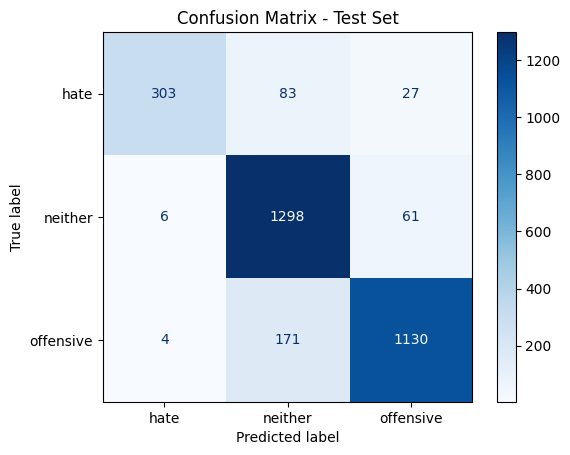

In [3]:

import pandas as pd

data_path = 'final swahili hate dataset.csv'  # <-- Change this
df = pd.read_csv(data_path)

# 3. Basic Preprocessing
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].astype(str).apply(clean_text)

# 4. Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
label_names = le.classes_

# 5. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])
y = df['label_encoded']

# 6. Split Data: 60% train, 20% val, 20% test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 7. Train SVM (RBF kernel)
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# 8. Evaluation on Test Set
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()


In [5]:
# 1. Upload CSV
from google.colab import files
uploaded = files.upload()


Saving final code-switched hate dataset.csv to final code-switched hate dataset.csv


Classification Report:
              precision    recall  f1-score   support

        hate       0.93      0.82      0.87       267
     neither       0.87      0.92      0.90       303
   offensive       0.85      0.90      0.88       221

    accuracy                           0.88       791
   macro avg       0.88      0.88      0.88       791
weighted avg       0.89      0.88      0.88       791

Accuracy: 0.8837


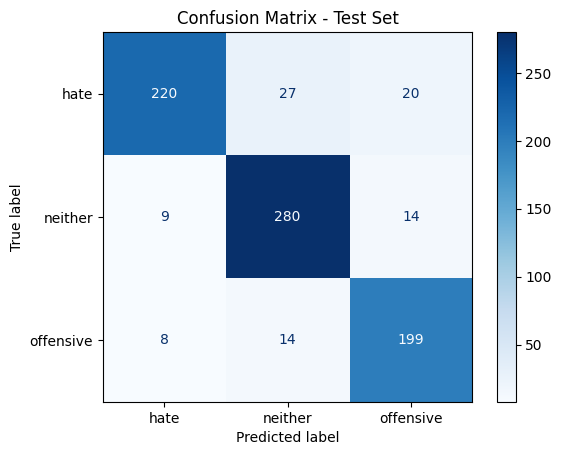

In [6]:
import pandas as pd

data_path = 'final code-switched hate dataset.csv'  # <-- Change this
df = pd.read_csv(data_path)

# 3. Basic Preprocessing
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].astype(str).apply(clean_text)

# 4. Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
label_names = le.classes_

# 5. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['text'])
y = df['label_encoded']

# 6. Split Data: 60% train, 20% val, 20% test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 7. Train SVM (RBF kernel)
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# 8. Evaluation on Test Set
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_names))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()